In [2]:
import pandas as pd
import re

In [3]:
df = pd.read_csv("non-ribosomal lipopeptides - list - Sheet2.csv")

In [4]:
df

,Fasta File,CHEMONTID,Classyfire Prediction,# Amide bonds,SMILES,AMINO ACID STARTER CONDENSATION DOMAIN,CHAIN LENGTH,BRANCHES
0,platinum_BGC0000296.fasta,CHEMONTID:0001994,Cyclic depsipeptides,12,O=C(C(C(C)C)NC(C1NC(C2=CC=C(C)C3=C2N=C(C(O3)=C...,AELPLTAAQREIWIAEQRLGKRNRVFRVGEYLEIHGRVDLGLFDRA...,"non-standard, SMILES: NC(=O)C1=C(C(=C(C=C1)C)O...",NaN
1,platinum_BGC0000299.fasta,CHEMONTID:0001994,Cyclic depsipeptides,5,C[C@@H](OC([C@H](NC([C@H](NC([C@@H](NC([C@H](N...,does not have a starter condensation domain (c...,"non-standard, SMILES: NC(=O)/C=C/C=C/C=C/C=C/c...",NaN
2,platinum_BGC0000309.fasta,CHEMONTID:0001994,Cyclic depsipeptides,6,O=C([C@H]([C@H](OC([C@H]1NC(CNC(C2=CC=CC(O)=C2...,QYSLTGAQTGIWFAQQLDPDNPIYNTAEYIEINGPVNIALFEEALR...,DHBA,NaN
3,platinum_BGC0000314.fasta,CHEMONTID:0001994,Cyclic depsipeptides,4,CCC(C1C(OC(C(NC(/C=C/C=C/C=C/C=C/C2=CC=C(O)C(B...,does not have a starter condensation domain (u...,"non-standard, SMILES: NC(=O)/C=C/C=C/C=C/C=C/c...",NaN
4,platinum_BGC0000315.fasta,CHEMONTID:0001994,Cyclic depsipeptides,13,CCCC1OC1C(=O)N[C@@H](CO)C(=O)N[C@H]1[C@@H](C)O...,RHGLTSAQHEVWLAQQLDPRGAHYRTGSCLEIDGPLDHAVLSRALR...,6,"2,3|O"
...,...,...,...,...,...,...,...,...
69,platinum_tolaasin.fasta (BGC0001806),CHEMONTID:0001994,Cyclic depsipeptides,18,O=C([C@]1([H])NC(/C(NC([C@](C(C)C)([H])NC([C@@...,QTFPLTASQKAIWLDQISQGDSPLYNIGNYLEIQGPIVPEVMQRAV...,"non-standard, SMILES: NC(CCCC(=O)O)=O",NaN
70,platinum_triostin_A.fasta (BGC0000450),CHEMONTID:0001994,Cyclic depsipeptides,11,O=C(N([C@H](C(OC[C@H](C(N[C@@H]1C)=O)NC(C2=CN=...,VTAVQEAMWLQQELAPDRPNNVVTLWDVDGDLDIPLITEALRTAVS...,"non-standard, SMILES: NC(=O)c2cnc1ccccc1n2",NaN
71,platinum_valinomycin.fasta (BGC0000453),CHEMONTID:0001994,Cyclic depsipeptides,6,O=C1NC(C(C)C)C(OC(C)C(NC(C(C)C)C(OC(C(C)C)C(NC...,does not have a starter condensation domain (u...,does not have a tail,NaN
72,platinum_xenoamicin.fasta (BGC0000464),CHEMONTID:0001994,Cyclic depsipeptides,13,O=C(N[C@H](C(N[C@H](C(C)C)C(N[C@@H](C(C)C)C(N[...,KFSLSSTQQVVWLDQYLRPDSTCYNLGSVVLIEGKLDEALLIHAFK...,"non-standard, SMILES: CCCC(=O)N1CCCC1C(=O)NC(C...",NaN


In [5]:
df[df["Fasta File"] == "platinum_lichenysin.fasta (BGC0000381) (repeat)"]

,Fasta File,CHEMONTID,Classyfire Prediction,# Amide bonds,SMILES,AMINO ACID STARTER CONDENSATION DOMAIN,CHAIN LENGTH,BRANCHES
50,platinum_lichenysin.fasta (BGC0000381) (repeat),CHEMONTID:0001994,Cyclic depsipeptides,7,O=C(NC(C(NC(C(NC(C(OC(CC(NC1CCC(N)=O)=O)CCCCCC...,NaN,NaN,NaN


In [6]:
df_nonull = df[df["AMINO ACID STARTER CONDENSATION DOMAIN"].notnull()]

In [7]:
df_starter = df_nonull[df_nonull["AMINO ACID STARTER CONDENSATION DOMAIN"].str.match('[A-Z]')]

In [8]:
len(df_starter)

50

In [9]:
df_starter

,Fasta File,CHEMONTID,Classyfire Prediction,# Amide bonds,SMILES,AMINO ACID STARTER CONDENSATION DOMAIN,CHAIN LENGTH,BRANCHES
0,platinum_BGC0000296.fasta,CHEMONTID:0001994,Cyclic depsipeptides,12,O=C(C(C(C)C)NC(C1NC(C2=CC=C(C)C3=C2N=C(C(O3)=C...,AELPLTAAQREIWIAEQRLGKRNRVFRVGEYLEIHGRVDLGLFDRA...,"non-standard, SMILES: NC(=O)C1=C(C(=C(C=C1)C)O...",NaN
2,platinum_BGC0000309.fasta,CHEMONTID:0001994,Cyclic depsipeptides,6,O=C([C@H]([C@H](OC([C@H]1NC(CNC(C2=CC=CC(O)=C2...,QYSLTGAQTGIWFAQQLDPDNPIYNTAEYIEINGPVNIALFEEALR...,DHBA,NaN
4,platinum_BGC0000315.fasta,CHEMONTID:0001994,Cyclic depsipeptides,13,CCCC1OC1C(=O)N[C@@H](CO)C(=O)N[C@H]1[C@@H](C)O...,RHGLTSAQHEVWLAQQLDPRGAHYRTGSCLEIDGPLDHAVLSRALR...,6,"2,3|O"
7,platinum_BGC0000358.fasta,CHEMONTID:0001994,Cyclic depsipeptides,7,C[C@H]1[C@@H](NC(CC(O)CCCCCCCCCCCC/N=C(N)/N)=O...,QSINLIIKQYDAFRIRITSVDGVPKQYVVPYEERQLECLDLTHIES...,NaN,NaN
8,platinum_BGC0000381.fasta,CHEMONTID:0001994,Cyclic depsipeptides,7,O=C(NC(C(NC(C(NC(C(OC(CC(NC1CCC(N)=O)=O)CCCCCC...,TFYPLTHAQRRIWYTEKFYPGTSVSNLSGFGKLKSASGIDSGLLTE...,"non-standard, SMILES: CCCCCCCCCCCCOC(=O)C(N)C(...",NaN
9,platinum_BGC0000399.fasta,CHEMONTID:0001994,Cyclic depsipeptides,10,CCCCCCCCCCCC(CC(NC(C(NC(C(NC1C(OC(C(C(C)C)NC(C...,RGLPLTAGQRDIWLDQLSRGDSPLYNIGGYAVLKGPFRPELMQRTV...,14,"1|O, 3|OH"
10,platinum_BGC0000415.fasta,CHEMONTID:0001994,Cyclic depsipeptides,11,C[C@H]1C(N(C)[C@H]2CS[C@H](SC)[C@H](N(C)C([C@H...,VTAVQEAMWLQQELAPDRPNNVVTLWDVDGDLDIPLITEALRTAVS...,"non-standard, SMILES: NC(=O)c2cnc1ccccc1n2",NaN
11,platinum_BGC0000433.fasta,CHEMONTID:0001994,Cyclic depsipeptides,7,O=C([C@@H](NC([C@@H](NC([C@@H](NC1=O)CC(C)C)=O...,FYPLTNAQKRIWYTEKFYPNTSISNLAGFGKLISEDGVQAHYVEKA...,14,1|O
12,platinum_BGC0000437.fasta,CHEMONTID:0001994,Cyclic depsipeptides,13,CCCCCCCCC[C@@H](CC(=O)N[C@H]1COC(=O)[C@@H](NC(...,LLPLASVQQGIWLDQLAYPHLPYYNIGMTLEIKGDIDIALFEKAIQ...,12,"1|O, 3|OH"
13,platinum_BGC0000443.fasta,CHEMONTID:0001994,Cyclic depsipeptides,9,O=C(C[C@H]([C@@H](CCCCCCCCCCCC)O)O)N[C@@H](C(N...,THELASVQQGIWLDQIAHPDLPYYNIGMSLEIKGEIDIPLFEKAIE...,16,"1|O, 3|OH, 4|OH"


In [10]:
df_starter.index

Int64Index([ 0,  2,  4,  7,  8,  9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21, 22,
            23, 24, 26, 27, 28, 30, 32, 36, 37, 38, 39, 40, 42, 43, 44, 45, 47,
            48, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 68, 69, 70, 72],
           dtype='int64')

In [11]:
processed_df = df_starter.copy()
processed_df.dropna(subset=["CHAIN LENGTH"], inplace = True)
for i in processed_df.index:
    print(processed_df.at[i,"CHAIN LENGTH"])
    if re.search(r"^\d+", processed_df.at[i,"CHAIN LENGTH"]) is None:
        processed_df.at[i, "CHAIN LENGTH"] = 0 
    else:
        processed_df.at[i, "CHAIN LENGTH"] = 1

non-standard, SMILES: NC(=O)C1=C(C(=C(C=C1)C)O)[N]
DHBA
6
non-standard, SMILES: CCCCCCCCCCCCOC(=O)C(N)C(C)CC
14
non-standard, SMILES: NC(=O)c2cnc1ccccc1n2
14
12
16
9
non-standard, SMILES: CC(C)CC(CC(N)=O)N(C)C(=O)C1CCCN1C(=O)C(C)O
10
16
DHBA
non-standard, SMILES: CC(C)C(NC=O)C(N)=O
non-standard, SMILES: NC(=O)c2nc1ccccc1cc2O
12
non-standard, SMILES: NC(=O)C(CO)NC(=O)CC(N)C(=O)O
10
10
non-standard, SMILES: NC(=O)c2cnc1ccccc1n2
There is no N-terminus
DHBA
non-standard, SMILES: N=C(N)NCCCCCCCCCCCCC(O)CC(N)=O
non-standard, SMILES: CC(=O)N(C)C(C(=O)N1CC(C)CC1C(=O)N(C)CC(N)=O)C(C)C
16
non-standard, SMILES: NC(=O)C(CC1CC1[N+](=O)O)NC(=O)c2ccc(Cl)n2O
14
14
15
DHBA
does not have a tail
16
6
non-standard, skip for now
DHBA
10
12
8
16
non-standard, SMILES: NC(CCCC(=O)O)=O
non-standard, SMILES: NC(=O)c2cnc1ccccc1n2
non-standard, SMILES: CCCC(=O)N1CCCC1C(=O)NC(C)C(=O)NC(C(=O)NC(CC(C)C)C(=O)NC(C(N)=O)C(C)CC)C(C)C


In [12]:
processed_df.to_csv("Classification_chain_df.csv")

In [54]:
processed_df["CHAIN LENGTH"].value_counts()

0    22
1    21
Name: CHAIN LENGTH, dtype: int64

In [55]:
processed_df["AMINO ACID STARTER CONDENSATION DOMAIN"].values

array(['AELPLTAAQREIWIAEQRLGKRNRVFRVGEYLEIHGRVDLGLFDRAVRLVVGEAQALHVRFTEAHGEVRQALRPPTDWAPTLVDLSAEPDPERAARAWLAAAVARPMDLAREHLFDHALLRLGDDRCYWYQGYHHIVMDAFGTVLITRRTAEVYTALAEGRPVSPSPFGSLDGFLAADQKYRDSEGFTGDRAYWTERFADRPEPTGIVARPSTTPDHYLRRTAALTPGELDGLREAARGARAPWSHLVIAAVAVYLHRMTGATDVVLGLPVTARLDQLQRRTPGTASNVLPLRLTV',
       'QYSLTGAQTGIWFAQQLDPDNPIYNTAEYIEINGPVNIALFEEALRHVIKEAESLHVRFGENMDGPWQMINPSPDVQLHVIDVSSEPDPEKTALNWMKADLAKPVDLGYAPLFNEALFIAGPDRFFWYQRIHHIAIDGFGFSLIAQRVASTYTALIKGQTAKSRSFGSLQAILEEDTDYRGSEQYEKDRQFWLDRFADAPEVVSLADRAPRTSNSFLRHTAYLPPSDVNALKEAARYFSGSWHEVMIAVSAVYVHRMTGSEDVVLGLPMMGRIGSASLNVPAMVMNLLPLRLTV',
       'RHGLTSAQHEVWLAQQLDPRGAHYRTGSCLEIDGPLDHAVLSRALRLTVAGTETLCSRFLTDEEGRPYRAYCPPAPEGSAAVEDPDGVPYTPVLLRHIDLSGHEDPEGEAQRWMDRDRATPLPLDRPGLSSHALFTLGGGRHLYYLGVHHIVIDGTSMALFYERLAEVYRALRDGRAVPAAAFGDTDRMVAGEEAYRASARYERDRAYWTGLFTDRPEPVSLTGRGGGRALAPTVRSLGLPPERTEVLGRAAEATGAHWARVVIAGVAAFLHRTTGARDVVVSVPVTGRYGANARITPGMVSNRLPLRLAV',
       'TFYPLTHAQRRIWYTEKFYPGTSVSNLSGFGKLKSASGIDSGLLTEAIRKFVRTNDTM

In [15]:
starter_matrix = [list(starter) for starter in processed_df["AMINO ACID STARTER CONDENSATION DOMAIN"].values]

In [16]:
starter_matrix_df = pd.DataFrame(starter_matrix)

In [17]:
starter_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,A,E,L,P,L,T,A,A,Q,R,...,None,None,None,None,None,None,None,None,None,None
1,Q,Y,S,L,T,G,A,Q,T,G,...,None,None,None,None,None,None,None,None,None,None
2,R,H,G,L,T,S,A,Q,H,E,...,V,None,None,None,None,None,None,None,None,None
3,T,F,Y,P,L,T,H,A,Q,R,...,None,None,None,None,None,None,None,None,None,None
4,R,G,L,P,L,T,A,G,Q,R,...,None,None,None,None,None,None,None,None,None,None
5,V,T,A,V,Q,E,A,M,W,L,...,None,None,None,None,None,None,None,None,None,None
6,F,Y,P,L,T,N,A,Q,K,R,...,None,None,None,None,None,None,None,None,None,None
7,L,L,P,L,A,S,V,Q,Q,G,...,None,None,None,None,None,None,None,None,None,None
8,T,H,E,L,A,S,V,Q,Q,G,...,None,None,None,None,None,None,None,None,None,None
9,P,L,S,T,A,Q,S,E,M,W,...,None,None,None,None,None,None,None,None,None,None


In [18]:
x = pd.get_dummies(starter_matrix_df, starter_matrix_df.columns)

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [20]:
y = processed_df["CHAIN LENGTH"].values

In [21]:
x = x.loc[:, x.columns].values

In [22]:
x = StandardScaler().fit_transform(x)

In [23]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components, columns = ["principal component 1", "principal component 2"])

In [24]:
principal_df

,principal component 1,principal component 2
0,-1.316794,2.378092
1,13.557157,-5.216969
2,12.218755,1.707007
3,-1.301593,-12.142435
4,-27.555402,-12.928718
5,-5.205345,39.464042
6,-4.496933,-6.119499
7,31.153955,-14.778529
8,33.110990,-15.658629
9,3.971457,7.732457


In [25]:
chain_length_df = pd.DataFrame(processed_df["CHAIN LENGTH"].values, columns = ["STANDARD OR NOT STANDARD LIPID TAILS"])

In [26]:
final_df = pd.concat([principal_df, chain_length_df], axis = 1)

In [27]:
final_df

,principal component 1,principal component 2,STANDARD OR NOT STANDARD LIPID TAILS
0,-1.316794,2.378092,0
1,13.557157,-5.216969,0
2,12.218755,1.707007,1
3,-1.301593,-12.142435,0
4,-27.555402,-12.928718,1
5,-5.205345,39.464042,0
6,-4.496933,-6.119499,1
7,31.153955,-14.778529,1
8,33.110990,-15.658629,1
9,3.971457,7.732457,1


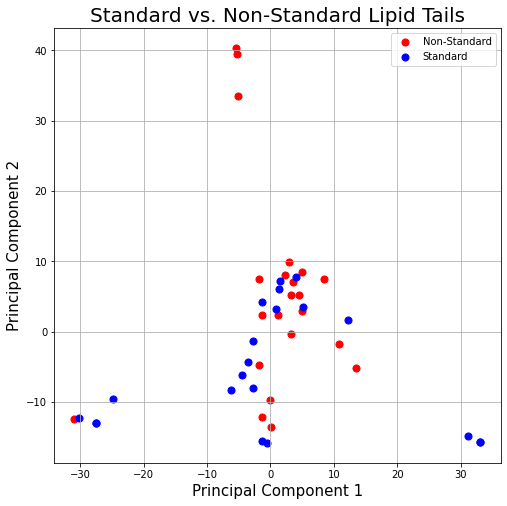

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title("Standard vs. Non-Standard Lipid Tails", fontsize = 20)

targets = [0, 1]
colors = ["r", "b"]
for target, color in zip(targets, colors):
    indices_to_keep = final_df["STANDARD OR NOT STANDARD LIPID TAILS"] == target
    ax.scatter(final_df.loc[indices_to_keep, "principal component 1"], final_df.loc[indices_to_keep, "principal component 2"], c = color, s = 50)
ax.legend(["Non-Standard", "Standard"])
ax.grid()

In [29]:
# Linear Regression

In [56]:
df

,Fasta File,CHEMONTID,Classyfire Prediction,# Amide bonds,SMILES,AMINO ACID STARTER CONDENSATION DOMAIN,CHAIN LENGTH,BRANCHES
0,platinum_BGC0000296.fasta,CHEMONTID:0001994,Cyclic depsipeptides,12,O=C(C(C(C)C)NC(C1NC(C2=CC=C(C)C3=C2N=C(C(O3)=C...,AELPLTAAQREIWIAEQRLGKRNRVFRVGEYLEIHGRVDLGLFDRA...,"non-standard, SMILES: NC(=O)C1=C(C(=C(C=C1)C)O...",NaN
1,platinum_BGC0000299.fasta,CHEMONTID:0001994,Cyclic depsipeptides,5,C[C@@H](OC([C@H](NC([C@H](NC([C@@H](NC([C@H](N...,does not have a starter condensation domain (c...,"non-standard, SMILES: NC(=O)/C=C/C=C/C=C/C=C/c...",NaN
2,platinum_BGC0000309.fasta,CHEMONTID:0001994,Cyclic depsipeptides,6,O=C([C@H]([C@H](OC([C@H]1NC(CNC(C2=CC=CC(O)=C2...,QYSLTGAQTGIWFAQQLDPDNPIYNTAEYIEINGPVNIALFEEALR...,DHBA,NaN
3,platinum_BGC0000314.fasta,CHEMONTID:0001994,Cyclic depsipeptides,4,CCC(C1C(OC(C(NC(/C=C/C=C/C=C/C=C/C2=CC=C(O)C(B...,does not have a starter condensation domain (u...,"non-standard, SMILES: NC(=O)/C=C/C=C/C=C/C=C/c...",NaN
4,platinum_BGC0000315.fasta,CHEMONTID:0001994,Cyclic depsipeptides,13,CCCC1OC1C(=O)N[C@@H](CO)C(=O)N[C@H]1[C@@H](C)O...,RHGLTSAQHEVWLAQQLDPRGAHYRTGSCLEIDGPLDHAVLSRALR...,6,"2,3|O"
...,...,...,...,...,...,...,...,...
69,platinum_tolaasin.fasta (BGC0001806),CHEMONTID:0001994,Cyclic depsipeptides,18,O=C([C@]1([H])NC(/C(NC([C@](C(C)C)([H])NC([C@@...,QTFPLTASQKAIWLDQISQGDSPLYNIGNYLEIQGPIVPEVMQRAV...,"non-standard, SMILES: NC(CCCC(=O)O)=O",NaN
70,platinum_triostin_A.fasta (BGC0000450),CHEMONTID:0001994,Cyclic depsipeptides,11,O=C(N([C@H](C(OC[C@H](C(N[C@@H]1C)=O)NC(C2=CN=...,VTAVQEAMWLQQELAPDRPNNVVTLWDVDGDLDIPLITEALRTAVS...,"non-standard, SMILES: NC(=O)c2cnc1ccccc1n2",NaN
71,platinum_valinomycin.fasta (BGC0000453),CHEMONTID:0001994,Cyclic depsipeptides,6,O=C1NC(C(C)C)C(OC(C)C(NC(C(C)C)C(OC(C(C)C)C(NC...,does not have a starter condensation domain (u...,does not have a tail,NaN
72,platinum_xenoamicin.fasta (BGC0000464),CHEMONTID:0001994,Cyclic depsipeptides,13,O=C(N[C@H](C(N[C@H](C(C)C)C(N[C@@H](C(C)C)C(N[...,KFSLSSTQQVVWLDQYLRPDSTCYNLGSVVLIEGKLDEALLIHAFK...,"non-standard, SMILES: CCCC(=O)N1CCCC1C(=O)NC(C...",NaN


In [57]:
amino_df = df.copy()
amino_df.dropna(subset=["CHAIN LENGTH"], inplace = True)

In [58]:
amino_df

,Fasta File,CHEMONTID,Classyfire Prediction,# Amide bonds,SMILES,AMINO ACID STARTER CONDENSATION DOMAIN,CHAIN LENGTH,BRANCHES
0,platinum_BGC0000296.fasta,CHEMONTID:0001994,Cyclic depsipeptides,12,O=C(C(C(C)C)NC(C1NC(C2=CC=C(C)C3=C2N=C(C(O3)=C...,AELPLTAAQREIWIAEQRLGKRNRVFRVGEYLEIHGRVDLGLFDRA...,"non-standard, SMILES: NC(=O)C1=C(C(=C(C=C1)C)O...",NaN
1,platinum_BGC0000299.fasta,CHEMONTID:0001994,Cyclic depsipeptides,5,C[C@@H](OC([C@H](NC([C@H](NC([C@@H](NC([C@H](N...,does not have a starter condensation domain (c...,"non-standard, SMILES: NC(=O)/C=C/C=C/C=C/C=C/c...",NaN
2,platinum_BGC0000309.fasta,CHEMONTID:0001994,Cyclic depsipeptides,6,O=C([C@H]([C@H](OC([C@H]1NC(CNC(C2=CC=CC(O)=C2...,QYSLTGAQTGIWFAQQLDPDNPIYNTAEYIEINGPVNIALFEEALR...,DHBA,NaN
3,platinum_BGC0000314.fasta,CHEMONTID:0001994,Cyclic depsipeptides,4,CCC(C1C(OC(C(NC(/C=C/C=C/C=C/C=C/C2=CC=C(O)C(B...,does not have a starter condensation domain (u...,"non-standard, SMILES: NC(=O)/C=C/C=C/C=C/C=C/c...",NaN
4,platinum_BGC0000315.fasta,CHEMONTID:0001994,Cyclic depsipeptides,13,CCCC1OC1C(=O)N[C@@H](CO)C(=O)N[C@H]1[C@@H](C)O...,RHGLTSAQHEVWLAQQLDPRGAHYRTGSCLEIDGPLDHAVLSRALR...,6,"2,3|O"
...,...,...,...,...,...,...,...,...
68,platinum_thanamycin.fasta (BGC0000443),CHEMONTID:0001994,Cyclic depsipeptides,9,O=C(C[C@H]([C@@H](CCCCCCCCCCCC)O)O)N[C@@H](C(N...,THELASVQQGIWLDQIAHPDLPYYNIGMSLEIKGEIDIPLFEKAIE...,16,"1|O, 3|OH, 4|OH"
69,platinum_tolaasin.fasta (BGC0001806),CHEMONTID:0001994,Cyclic depsipeptides,18,O=C([C@]1([H])NC(/C(NC([C@](C(C)C)([H])NC([C@@...,QTFPLTASQKAIWLDQISQGDSPLYNIGNYLEIQGPIVPEVMQRAV...,"non-standard, SMILES: NC(CCCC(=O)O)=O",NaN
70,platinum_triostin_A.fasta (BGC0000450),CHEMONTID:0001994,Cyclic depsipeptides,11,O=C(N([C@H](C(OC[C@H](C(N[C@@H]1C)=O)NC(C2=CN=...,VTAVQEAMWLQQELAPDRPNNVVTLWDVDGDLDIPLITEALRTAVS...,"non-standard, SMILES: NC(=O)c2cnc1ccccc1n2",NaN
71,platinum_valinomycin.fasta (BGC0000453),CHEMONTID:0001994,Cyclic depsipeptides,6,O=C1NC(C(C)C)C(OC(C)C(NC(C(C)C)C(OC(C(C)C)C(NC...,does not have a starter condensation domain (u...,does not have a tail,NaN


In [59]:
for i in amino_df.index:
    if re.search(r"^\d+",amino_df.at[i,"CHAIN LENGTH"]) is None:
        amino_df.drop(index = i, inplace = True)

In [60]:
amino_df

,Fasta File,CHEMONTID,Classyfire Prediction,# Amide bonds,SMILES,AMINO ACID STARTER CONDENSATION DOMAIN,CHAIN LENGTH,BRANCHES
4,platinum_BGC0000315.fasta,CHEMONTID:0001994,Cyclic depsipeptides,13,CCCC1OC1C(=O)N[C@@H](CO)C(=O)N[C@H]1[C@@H](C)O...,RHGLTSAQHEVWLAQQLDPRGAHYRTGSCLEIDGPLDHAVLSRALR...,6,"2,3|O"
6,platinum_BGC0000329.fasta,CHEMONTID:0001994,Cyclic depsipeptides,22,CCCCCCCC(O)CC(N/C(C(N1CCCC1C(NC(C(NC(C(NC(C(NC...,does not have a starter condensation domain (u...,12,"1|OH, 3|OH"
9,platinum_BGC0000399.fasta,CHEMONTID:0001994,Cyclic depsipeptides,10,CCCCCCCCCCCC(CC(NC(C(NC(C(NC1C(OC(C(C(C)C)NC(C...,RGLPLTAGQRDIWLDQLSRGDSPLYNIGGYAVLKGPFRPELMQRTV...,14,"1|O, 3|OH"
11,platinum_BGC0000433.fasta,CHEMONTID:0001994,Cyclic depsipeptides,7,O=C([C@@H](NC([C@@H](NC([C@@H](NC1=O)CC(C)C)=O...,FYPLTNAQKRIWYTEKFYPNTSISNLAGFGKLISEDGVQAHYVEKA...,14,1|O
12,platinum_BGC0000437.fasta,CHEMONTID:0001994,Cyclic depsipeptides,13,CCCCCCCCC[C@@H](CC(=O)N[C@H]1COC(=O)[C@@H](NC(...,LLPLASVQQGIWLDQLAYPHLPYYNIGMTLEIKGDIDIALFEKAIQ...,12,"1|O, 3|OH"
13,platinum_BGC0000443.fasta,CHEMONTID:0001994,Cyclic depsipeptides,9,O=C(C[C@H]([C@@H](CCCCCCCCCCCC)O)O)N[C@@H](C(N...,THELASVQQGIWLDQIAHPDLPYYNIGMSLEIKGEIDIPLFEKAIE...,16,"1|O, 3|OH, 4|OH"
15,platinum_BGC0000461.fasta,CHEMONTID:0001994,Cyclic depsipeptides,13,O=C([C@@H](N(C([C@H](NC([C@H](NC([C@H](NC1=O)C...,PLSTAQSEMWFAQELDADNWLYHSCGYLDIGGPLDLARFEQALRRF...,9,"1|O, 7|C"
17,platinum_BGC0000463.fasta,CHEMONTID:0001994,Cyclic depsipeptides,14,CC(C)C[C@@H](C(N[C@H](C(N[C@H](C(N[C@H](C(N[C@...,does not have a starter condensation domain (404),10,"1|O, 3|OH"
19,platinum_BGC0001050.fasta,CHEMONTID:0001994,Cyclic depsipeptides,7,CCCCCC/C=C\CC(=O)N[C@@H](CO)C(=O)N[C@@H](C(C)C...,PMPLSGAQAAIWAELAAGGVATTFYNIADQISLNGPLDPAAFRAAL...,10,"1|O, 3-4(double bond)"
20,platinum_BGC0001095.fasta,CHEMONTID:0001994,Cyclic depsipeptides,12,CCCCCCCCCCCCCC(CC(=O)N[C@@H](CCC(=O)O)C(=O)N[C...,TVYSLTHAQRRVWFTELLEPGTSICNLAACVKFRGDIDFDVLRHAL...,16,"1|O, 3|OH"


In [61]:
amino_df.to_csv("Chain_lengths_df.csv")

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
aminos = amino_df["# Amide bonds"].values

In [37]:
x = aminos.reshape(-1,1)
y = amino_df["CHAIN LENGTH"].values

In [38]:
x,y

(array([[13],
        [22],
        [10],
        [ 7],
        [13],
        [ 9],
        [13],
        [14],
        [ 7],
        [12],
        [ 7],
        [ 9],
        [11],
        [14],
        [14],
        [ 9],
        [10],
        [ 9],
        [ 8],
        [ 7],
        [10],
        [13],
        [12],
        [18],
        [11],
        [ 7],
        [12],
        [ 9]], dtype=int64),
 array(['6', '12', '14', '14', '12', '16', '9', '10', '10', '16', '12',
        '10', '10', '10', '10', '16', '14', '12', '10', '6', '14', '15',
        '16', '6', '10', '12', '8', '16'], dtype=object))

In [39]:
model = LinearRegression()

In [40]:
model.fit(x, y)

LinearRegression()

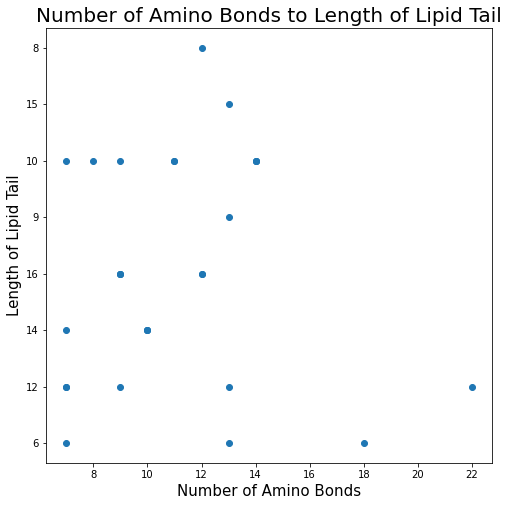

In [41]:
lin_fig = plt.figure(figsize = (8,8))
ax = lin_fig.add_subplot(1,1,1)
ax.set_xlabel("Number of Amino Bonds", fontsize = 15)
ax.set_ylabel("Length of Lipid Tail", fontsize = 15)
ax.set_title("Number of Amino Bonds to Length of Lipid Tail", fontsize = 20)

ax.scatter(x,y)

In [42]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.04585069535708264
intercept: 13.77995642701525
slope: [-0.19302832]
